In [7]:
import pandas as pd
from sqlalchemy import create_engine, func, inspect
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import numpy as np
import datetime as dt

In [8]:
Spain_Weather1 = "2000-2004_weather-data-spain.csv"
Spain_Weather1_df = pd.read_csv(Spain_Weather1)
Spain_Weather1_df.head()

,station_id,station_name,lat,lat_dir,long,long_dir,altitude,town,province,year,...,max_wind,max_wind_direction,max_wind_time,avg_wind,rainfall,sun,max_atmospheric_pressure,max_atmospheric_pressure_hour,min_atmospheric_pressure,min_atmospheric_pressure_hour
0,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2000,...,8.9,14.0,13:06,2.8,0,8.7,1008.6,24,1007.0,18
1,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2002,...,8.6,11.0,10:28,3.6,0,3.6,1012.5,9,1010.3,16
2,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2000,...,6.4,21.0,13:26,1.9,2.4,0.0,1002.1,0,996.9,16
3,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2000,...,11.9,30.0,0:22,6.1,0.4,7.9,1000.1,9,995.0,0
4,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2003,...,8.1,15.0,13:30,3.6,0,9.9,1006.5,8,1003.8,24


In [9]:
Spain_Weather2 = "2005-2009_weather-data-spain.csv"
Spain_Weather2_df = pd.read_csv(Spain_Weather2)
Spain_Weather2_df.head()

,station_id,station_name,lat,lat_dir,long,long_dir,altitude,town,province,year,...,max_wind,max_wind_direction,max_wind_time,avg_wind,rainfall,sun,max_atmospheric_pressure,max_atmospheric_pressure_hour,min_atmospheric_pressure,min_atmospheric_pressure_hour
0,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2006,...,9.2,99.0,Varias,3.1,0,6.2,1014.4,0,1003.9,24
1,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2007,...,7.8,14.0,11:23,2.8,0,12.9,1002.4,0,998.4,17
2,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2006,...,8.3,17.0,13:17,3.1,0,10.8,1008.1,Varias,1005.5,16
3,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2009,...,7.2,99.0,Varias,2.2,0,10.6,1013.1,0,1011.5,16
4,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2007,...,22.8,31.0,16:51,9.7,0,3.8,1009.4,24,999.8,11


In [10]:
Spain_Weather3 = "2010-2012_weather-data-spain.csv"
Spain_Weather3_df = pd.read_csv(Spain_Weather3)
Spain_Weather3_df.head()

,station_id,station_name,lat,lat_dir,long,long_dir,altitude,town,province,year,...,max_wind,max_wind_direction,max_wind_time,avg_wind,rainfall,sun,max_atmospheric_pressure,max_atmospheric_pressure_hour,min_atmospheric_pressure,min_atmospheric_pressure_hour
0,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2010,...,5.8,99.0,Varias,2.2,0,3.1,1010.0,0,1000.5,14
1,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2011,...,8.9,99.0,Varias,3.6,0,2.1,1007.3,Varias,1005.0,16
2,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2010,...,7.2,99.0,Varias,2.8,0,13.0,1005.2,Varias,1002.2,3
3,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2011,...,6.7,17.0,12:41,1.7,0,7.5,1010.0,Varias,1007.7,14
4,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2010,...,8.9,1.0,8:59,3.3,4.9,0.0,996.8,0,991.9,23


In [11]:
Spain_Weather1_df.dropna(how='all')

,station_id,station_name,lat,lat_dir,long,long_dir,altitude,town,province,year,...,max_wind,max_wind_direction,max_wind_time,avg_wind,rainfall,sun,max_atmospheric_pressure,max_atmospheric_pressure_hour,min_atmospheric_pressure,min_atmospheric_pressure_hour
0,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2000,...,8.9,14.0,13:06,2.8,0,8.7,1008.6,24,1007.0,18
1,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2002,...,8.6,11.0,10:28,3.6,0,3.6,1012.5,9,1010.3,16
2,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2000,...,6.4,21.0,13:26,1.9,2.4,0.0,1002.1,0,996.9,16
3,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2000,...,11.9,30.0,0:22,6.1,0.4,7.9,1000.1,9,995.0,0
4,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2003,...,8.1,15.0,13:30,3.6,0,9.9,1006.5,8,1003.8,24
5,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2004,...,21.7,31.0,2:25,6.4,0,8.6,1011.0,Varias,1003.3,1
6,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2002,...,13.9,30.0,16:09,5.3,2.6,0.0,996.5,0,990.5,18
7,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2000,...,9.4,34.0,8:20,4.2,0.5,10.2,1003.8,0,999.5,24
8,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2004,...,6.7,99.0,Varias,2.2,0,NaN,1003.7,0,998.0,17
9,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2000,...,6.1,17.0,12:01,1.7,0,12.0,1012.9,23,1010.2,23


In [12]:
Spain_Weather2_df.dropna(how='all')

,station_id,station_name,lat,lat_dir,long,long_dir,altitude,town,province,year,...,max_wind,max_wind_direction,max_wind_time,avg_wind,rainfall,sun,max_atmospheric_pressure,max_atmospheric_pressure_hour,min_atmospheric_pressure,min_atmospheric_pressure_hour
0,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2006,...,9.2,99.0,Varias,3.1,0,6.2,1014.4,0,1003.9,24
1,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2007,...,7.8,14.0,11:23,2.8,0,12.9,1002.4,0,998.4,17
2,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2006,...,8.3,17.0,13:17,3.1,0,10.8,1008.1,Varias,1005.5,16
3,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2009,...,7.2,99.0,Varias,2.2,0,10.6,1013.1,0,1011.5,16
4,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2007,...,22.8,31.0,16:51,9.7,0,3.8,1009.4,24,999.8,11
5,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2009,...,6.7,1.0,22:51,1.9,0,6.3,1007.1,Varias,1003.6,1
6,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2008,...,9.2,99.0,Varias,3.9,0,4.4,1028.4,Varias,1024.9,24
7,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2005,...,7.8,99.0,Varias,2.5,0,10.5,1005.9,Varias,1002.9,19
8,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2008,...,12.5,3.0,5:56,4.2,16.8,0.0,1008.8,Varias,1005.1,0
9,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2009,...,9.2,13.0,12:36,3.3,0,10.8,1012.5,0,1008.6,16


In [13]:
Spain_Weather3_df.dropna(how='all')

,station_id,station_name,lat,lat_dir,long,long_dir,altitude,town,province,year,...,max_wind,max_wind_direction,max_wind_time,avg_wind,rainfall,sun,max_atmospheric_pressure,max_atmospheric_pressure_hour,min_atmospheric_pressure,min_atmospheric_pressure_hour
0,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2010,...,5.8,99.0,Varias,2.2,0,3.1,1010.0,0,1000.5,14
1,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2011,...,8.9,99.0,Varias,3.6,0,2.1,1007.3,Varias,1005.0,16
2,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2010,...,7.2,99.0,Varias,2.8,0,13.0,1005.2,Varias,1002.2,3
3,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2011,...,6.7,17.0,12:41,1.7,0,7.5,1010.0,Varias,1007.7,14
4,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2010,...,8.9,1.0,8:59,3.3,4.9,0.0,996.8,0,991.9,23
5,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2011,...,9.2,18.0,12:40,2.5,0,11.3,1017.7,0,1012.6,24
6,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2011,...,NaN,NaN,NaN,1.9,0,12.2,1011.6,0,1008.3,17
7,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2011,...,NaN,NaN,NaN,2.5,14.6,1.1,1012.6,Varias,1005.4,3
8,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2010,...,9.2,99.0,Varias,3.9,0,10.9,1011.1,0,1007.6,15
9,0016A,REUS AEROPUERTO,41.0859,N,1.1044,E,71,Constantí,TARRAGONA,2010,...,8.9,20.0,14:24,2.5,0,12.3,1009.2,0,1004.9,24


In [14]:
# Create a filtered dataframe from specific columns
Spain_Weather1_columns = ["station_id", "province", "year", "avg_temp", "rainfall", "sun"]
weather1= Spain_Weather1_df[Spain_Weather1_columns].copy()

# Rename the column headers
weather1 = weather1.rename(columns={"station_id": "id",
                                    "province": "province",
                                    "year": "year",
                                    "avg_temp":"temp",
                                    "rainfall":"rainfall",
                                    "sun":"sun"})

# Cleaned the data setting the index
weather1.set_index("id", inplace=True)

weather1.head()

,province,year,temp,rainfall,sun
id,,,,,
0016A,TARRAGONA,2000,23.2,0,8.7
0016A,TARRAGONA,2002,11.7,0,3.6
0016A,TARRAGONA,2000,14.4,2.4,0.0
0016A,TARRAGONA,2000,14.9,0.4,7.9
0016A,TARRAGONA,2003,26.8,0,9.9


In [15]:
# Create a filtered dataframe from specific columns
Spain_Weather2_columns = ["station_id", "province", "year", "avg_temp", "rainfall", "sun"]
weather2= Spain_Weather2_df[Spain_Weather2_columns].copy()

# Rename the column headers
weather2 = weather2.rename(columns={"station_id": "id",
                                    "province": "province",
                                    "year": "year",
                                    "avg_temp":"temp",
                                    "rainfall":"rainfall",
                                    "sun":"sun"})

# Cleaned the data setting the index
weather2.set_index("id", inplace=True)

weather2.head()

,province,year,temp,rainfall,sun
id,,,,,
0016A,TARRAGONA,2006,8.4,0,6.2
0016A,TARRAGONA,2007,22.4,0,12.9
0016A,TARRAGONA,2006,27.4,0,10.8
0016A,TARRAGONA,2009,21.2,0,10.6
0016A,TARRAGONA,2007,16.6,0,3.8


In [16]:
# Create a filtered dataframe from specific columns
Spain_Weather3_columns = ["station_id", "province", "year", "avg_temp", "rainfall", "sun"]
weather3 = Spain_Weather3_df[Spain_Weather3_columns].copy()

# Rename the column headers
weather3 = weather3.rename(columns={"station_id": "id",
                                    "province": "province",
                                    "year": "year",
                                    "avg_temp":"temp",
                                    "rainfall":"rainfall",
                                    "sun":"sun"})

# Cleaned the data setting the index
weather3.set_index("id", inplace=True)

weather3.head()

,province,year,temp,rainfall,sun
id,,,,,
0016A,TARRAGONA,2010,7.2,0,3.1
0016A,TARRAGONA,2011,16.5,0,2.1
0016A,TARRAGONA,2010,18.0,0,13.0
0016A,TARRAGONA,2011,16.4,0,7.5
0016A,TARRAGONA,2010,19.7,4.9,0.0


In [17]:
# Drop a row by condition
noip1=weather1[weather1.rainfall != 'Ip']
noip1.head()

,province,year,temp,rainfall,sun
id,,,,,
0016A,TARRAGONA,2000,23.2,0,8.7
0016A,TARRAGONA,2002,11.7,0,3.6
0016A,TARRAGONA,2000,14.4,2.4,0.0
0016A,TARRAGONA,2000,14.9,0.4,7.9
0016A,TARRAGONA,2003,26.8,0,9.9


In [18]:
# Drop a row by condition
noip2=weather2[weather2.rainfall != 'Ip']
noip2=noip2[noip2.rainfall != 'Acum']
noip2.head()

,province,year,temp,rainfall,sun
id,,,,,
0016A,TARRAGONA,2006,8.4,0,6.2
0016A,TARRAGONA,2007,22.4,0,12.9
0016A,TARRAGONA,2006,27.4,0,10.8
0016A,TARRAGONA,2009,21.2,0,10.6
0016A,TARRAGONA,2007,16.6,0,3.8


In [19]:
# Drop a row by condition
noip3=weather3[weather3.rainfall != 'Ip']
noip3=noip3[noip3.rainfall != 'Acum']
noip3.head()

,province,year,temp,rainfall,sun
id,,,,,
0016A,TARRAGONA,2010,7.2,0,3.1
0016A,TARRAGONA,2011,16.5,0,2.1
0016A,TARRAGONA,2010,18.0,0,13.0
0016A,TARRAGONA,2011,16.4,0,7.5
0016A,TARRAGONA,2010,19.7,4.9,0.0


In [20]:
rainSeries = noip1["rainfall"]
rainfall_list= rainSeries.tolist()
noip1 = noip1.drop(columns="rainfall")
rainfall_list= [float(i) for i in rainfall_list]
noip1["rainfall"]=rainfall_list
noip1.head()

,province,year,temp,sun,rainfall
id,,,,,
0016A,TARRAGONA,2000,23.2,8.7,0.0
0016A,TARRAGONA,2002,11.7,3.6,0.0
0016A,TARRAGONA,2000,14.4,0.0,2.4
0016A,TARRAGONA,2000,14.9,7.9,0.4
0016A,TARRAGONA,2003,26.8,9.9,0.0


In [21]:
rainSeries2 = noip2["rainfall"]
rainfall_list2= rainSeries2.tolist()
noip2 = noip2.drop(columns="rainfall")
rainfall_list2= [float(i) for i in rainfall_list2]
noip2["rainfall"]=rainfall_list2
noip2.head()

,province,year,temp,sun,rainfall
id,,,,,
0016A,TARRAGONA,2006,8.4,6.2,0.0
0016A,TARRAGONA,2007,22.4,12.9,0.0
0016A,TARRAGONA,2006,27.4,10.8,0.0
0016A,TARRAGONA,2009,21.2,10.6,0.0
0016A,TARRAGONA,2007,16.6,3.8,0.0


In [22]:
rainSeries3 = noip3["rainfall"]
rainfall_list3= rainSeries3.tolist()
noip3 = noip3.drop(columns="rainfall")
rainfall_list3= [float(i) for i in rainfall_list3]
noip3["rainfall"]=rainfall_list3
noip3.head()

,province,year,temp,sun,rainfall
id,,,,,
0016A,TARRAGONA,2010,7.2,3.1,0.0
0016A,TARRAGONA,2011,16.5,2.1,0.0
0016A,TARRAGONA,2010,18.0,13.0,0.0
0016A,TARRAGONA,2011,16.4,7.5,0.0
0016A,TARRAGONA,2010,19.7,0.0,4.9


In [23]:
temp1_avg = noip1.groupby(["province"]).mean()["temp"].rename("Average Temp")
rain1_avg = noip1.groupby(["province"]).mean()["rainfall"].rename("Average Rainfall")
sun1_avg = noip1.groupby(["province"]).mean()["sun"].rename("Average Sun")

weather1_df = pd.DataFrame({"Average Temp":temp1_avg, "Average Rainfall":rain1_avg, "Average Sun":sun1_avg})

weather1_df.head()

,Average Temp,Average Rainfall,Average Sun
province,,,
A CORUÑA,13.996235,3.948450,5.389587
ALBACETE,15.118621,0.919977,7.867895
ALICANTE,18.618544,0.802292,8.106934
ALMERIA,19.330142,0.522833,8.349035
ARABA/ALAVA,12.039312,2.094746,5.395650


In [24]:
temp2_avg = noip2.groupby(["province"]).mean()["temp"].rename("Average Temp")
rain2_avg = noip2.groupby(["province"]).mean()["rainfall"].rename("Average Rainfall")
sun2_avg = noip2.groupby(["province"]).mean()["sun"].rename("Average Sun")

weather2_df = pd.DataFrame({"Average Temp":temp2_avg, "Average Rainfall":rain2_avg, "Average Sun":sun2_avg})

weather2_df.head()

,Average Temp,Average Rainfall,Average Sun
province,,,
A CORUÑA,14.095178,3.576156,5.667988
ALBACETE,15.239565,0.940750,8.057457
ALICANTE,18.140251,0.839193,7.676143
ALMERIA,19.029625,0.607657,8.313273
ARABA/ALAVA,11.837676,2.126937,5.551878


In [25]:
temp3_avg = noip3.groupby(["province"]).mean()["temp"].rename("Average Temp")
rain3_avg = noip3.groupby(["province"]).mean()["rainfall"].rename("Average Rainfall")
sun3_avg = noip3.groupby(["province"]).mean()["sun"].rename("Average Sun")

weather3_df = pd.DataFrame({"Average Temp":temp3_avg, "Average Rainfall":rain3_avg, "Average Sun":sun3_avg})

weather3_df.head()

,Average Temp,Average Rainfall,Average Sun
province,,,
A CORUÑA,13.781333,2.996745,5.504585
ALBACETE,14.535329,1.174062,7.859503
ALICANTE,17.694375,0.798217,7.590320
ALMERIA,18.653897,0.687143,8.438182
ARABA/ALAVA,11.274633,1.653939,5.177941


In [26]:
temp1_avg = noip1.groupby(["year"]).mean()["temp"].rename("Average Temp")
rain1_avg = noip1.groupby(["year"]).mean()["rainfall"].rename("Average Rainfall")
sun1_avg = noip1.groupby(["year"]).mean()["sun"].rename("Average Sun")

year1_df = pd.DataFrame({"Average Temp":temp1_avg, "Average Rainfall":rain1_avg, "Average Sun":sun1_avg})

year1_df.head()

,Average Temp,Average Rainfall,Average Sun
year,,,
2000,15.557709,1.696205,7.381391
2001,15.812559,1.567537,7.353358
2002,15.844907,1.821116,7.007171
2003,16.200078,1.811952,7.148055
2004,15.673263,1.527379,7.177161


In [27]:
temp2_avg = noip2.groupby(["year"]).mean()["temp"].rename("Average Temp")
rain2_avg = noip2.groupby(["year"]).mean()["rainfall"].rename("Average Rainfall")
sun2_avg = noip2.groupby(["year"]).mean()["sun"].rename("Average Sun")

year2_df = pd.DataFrame({"Average Temp":temp2_avg, "Average Rainfall":rain2_avg, "Average Sun":sun2_avg})

year2_df.head()

,Average Temp,Average Rainfall,Average Sun
year,,,
2005,15.577721,1.326387,7.565303
2006,16.249962,1.676402,7.077054
2007,15.498651,1.500779,7.247313
2008,15.423147,1.836775,7.033260
2009,16.073425,1.651718,7.367130


In [28]:
temp3_avg = noip3.groupby(["year"]).mean()["temp"].rename("Average Temp")
rain3_avg = noip3.groupby(["year"]).mean()["rainfall"].rename("Average Rainfall")
sun3_avg = noip3.groupby(["year"]).mean()["sun"].rename("Average Sun")

year3_df = pd.DataFrame({"Average Temp":temp3_avg, "Average Rainfall":rain3_avg, "Average Sun":sun3_avg})

year3_df.head()

,Average Temp,Average Rainfall,Average Sun
year,,,
2010,15.513039,2.033740,6.972321
2011,16.335887,1.430940,7.337557
2012,8.097983,0.708198,6.391405


In [36]:
final_year = year1_df.append(year2_df)
final_year = final_year.append(year3_df)

final_year = final_year.rename(columns={"year": "year",
                                                         "Average Temp": "average_temp",
                                                         "Average Rainfall": "average_rain",
                                                         "Average Sun": "average_sun"})

final_year = final_year.reset_index()

final_year.to_csv('/path/final_weather.csv')

In [37]:
import pandas as pd
from sqlalchemy import create_engine
import pymysql
pymysql.install_as_MySQLdb()

engine = create_engine('mysql://root:<password>@localhost/spanish_wine')

In [38]:
# Confirm tables
engine.table_names()

['weather', 'wine']

In [39]:
final_year.to_sql(name='weather', con=engine, if_exists='append', index=False)

In [132]:
conn = engine.connect()

# wine_avgs = engine.execute("""select years, avg(wine.points) as avg_score, average_sun, average_rain, average_temp
# from wine 
# inner join weather on wine.years = weather.year
# group by years, average_sun, average_rain, average_temp 
# order by avg_score desc; 
# """)

wine_avgs = pd.read_sql("""select years, avg(wine.points) as avg_score, average_sun, average_rain, average_temp
from wine 
inner join weather on wine.years = weather.year
group by years, average_sun, average_rain, average_temp 
order by avg_score desc; 
""", conn)

wine_avgs = wine_avgs.sort_values(by=["years"])
wine_avgs = wine_avgs.drop([6])
wine_avgs

,years,avg_score,average_sun,average_rain,average_temp
12,2000,85.5484,7.381391,1.696205,15.557709
0,2001,88.3696,7.353358,1.567537,15.812559
11,2002,86.1923,7.007171,1.821116,15.844907
8,2003,87.3457,7.148055,1.811952,16.200078
3,2004,87.9679,7.177161,1.527379,15.673263
2,2005,87.9923,7.565303,1.326387,15.577721
7,2006,87.6270,7.077054,1.676402,16.249962
9,2007,87.2225,7.247313,1.500779,15.498651
10,2008,86.9594,7.033260,1.836775,15.423147
5,2009,87.8003,7.367130,1.651718,16.073425


In [133]:
import matplotlib.pyplot as plt

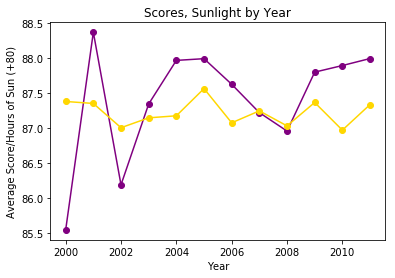

In [140]:
years = wine_avgs["years"].tolist()
scores = wine_avgs["avg_score"].tolist()
sun = wine_avgs["average_sun"].tolist()
rain = wine_avgs["average_rain"].tolist()
temps = wine_avgs["average_temp"].tolist()

sun = [i+80 for i in sun]
rain = [i+85 for i in rain]
temps = [i+72 for i in temps]

plt.plot(years, scores, linestyle="-", marker="o", color="purple")
plt.plot(years, sun, linestyle="-", marker="o", color="gold")
plt.xlabel("Year")
plt.ylabel("Average Score/Hours of Sun (+80)")
plt.title("Scores, Sunlight by Year")

plt.savefig("/Users/christophersicking/Desktop/SunScore.png")
plt.show()

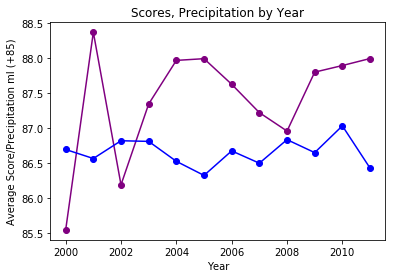

In [141]:
plt.plot(years, scores, linestyle="-", marker="o", color="purple")
plt.plot(years, rain, linestyle="-", marker="o", color="blue")
plt.xlabel("Year")
plt.ylabel("Average Score/Precipitation ml (+85)")
plt.title("Scores, Precipitation by Year")

plt.savefig("/Users/christophersicking/Desktop/RainScore.png")
plt.show()

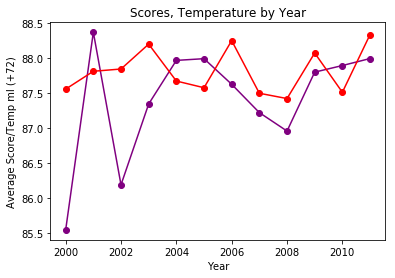

In [142]:
plt.plot(years, scores, linestyle="-", marker="o", color="purple")
plt.plot(years, temps, linestyle="-", marker="o", color="red")
plt.xlabel("Year")
plt.ylabel("Average Score/Temp ml (+72)")
plt.title("Scores, Temperature by Year")

plt.savefig("/Users/christophersicking/Desktop/TempScore.png")
plt.show()